<a href="https://colab.research.google.com/github/sunny420x/Job-Quiting-Prediction-using-Polynomial-Regression-Model/blob/main/Job_Quiting_Prediction_using_Polynomial_Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression

def ScoresWord(val):
  if(val == 'low'):
    return 1
  if(val == 'medium'):
    return 2
  if(val == "high"):
    return 3
  return val

def toPercentage(val):
  val = float(val)
  if(val > 0 and val < 1):
    return val*100
  else:
    return val

def ScoresDepartments(val):
  if(val == 'sales'):
    return 1
  if(val == 'accounting'):
    return 2
  if(val == 'hr'):
    return 3
  if(val == 'technical'):
    return 4
  if(val == 'support'):
    return 5
  if(val == 'IT'):
    return 6
  if(val == 'product_mng'):
    return 7
  if(val == 'management'):
    return 8
  if(val == 'marketing'):
    return 9
  if(val == 'RandD'):
    return 10

names = "satisfaction_level last_evaluation number_project average_montly_hours time_spend_company Work_accident left promotion_last_5years Department salary".split(" ")

df = pd.read_csv("./Data/HR_comma_sep.csv", names=names)
df = df[1::]

df = df.drop("Department", axis=1)

df = df.map(ScoresWord)

# df['Department'] = df['Department'].apply(ScoresDepartments)

df2 = df['left']
df = df.drop('left', axis=1)

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
1,0.38,0.53,2,157,3,0,0,1
2,0.8,0.86,5,262,6,0,0,2
3,0.11,0.88,7,272,4,0,0,2
4,0.72,0.87,5,223,5,0,0,1
5,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14995,0.4,0.57,2,151,3,0,0,1
14996,0.37,0.48,2,160,3,0,0,1
14997,0.37,0.53,2,143,3,0,0,1
14998,0.11,0.96,6,280,4,0,0,1


In [124]:
from sklearn.preprocessing import PolynomialFeatures

df = df.apply(pd.to_numeric, errors='coerce')
df_arr = df.values
left_arr = df2.values

X = df_arr[:,0:len(df_arr[1])]
Y = left_arr[::]
Y = pd.to_numeric(Y, errors='coerce')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

X train size: 11999
X test size: 3000
Y train size: 11999
Y test size: 3000
Train MSE: 0.0664369446650135
Test MSE: 0.0711382688983509
Train R²: 0.6344774921260791
Test R²: 0.6046810005130034


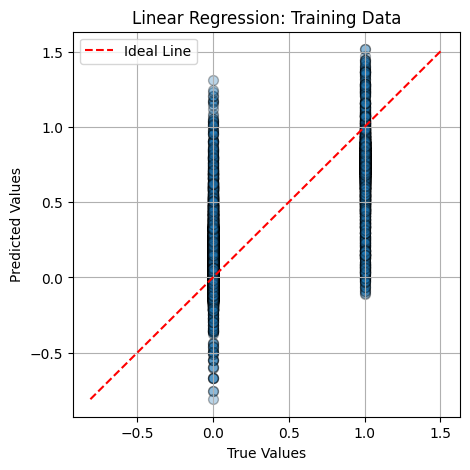

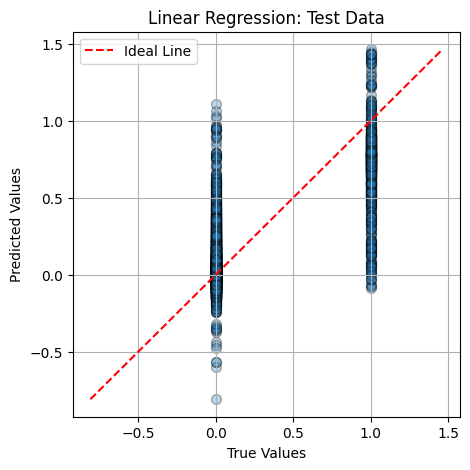

In [125]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print("X train size: "+str(len(X_train)))
print("X test size: "+str(len(X_test)))

print("Y train size: "+str(len(Y_train)))
print("Y test size: "+str(len(Y_test)))

lr = LinearRegression()
lr.fit(X_train_poly, Y_train)

Y_linear_train_prediction = lr.predict(X_train_poly)
Y_linear_test_prediction = lr.predict(X_test_poly)

#Y_linear_train_prediction
#Y_linear_test_prediction

lr_train_mse = mean_squared_error(Y_train, Y_linear_train_prediction)
lr_test_mse = mean_squared_error(Y_test, Y_linear_test_prediction)

lr_train_r2 = r2_score(Y_train, Y_linear_train_prediction)
lr_test_r2 = r2_score(Y_test, Y_linear_test_prediction)

print("Train MSE:",lr_train_mse)
print("Test MSE:",lr_test_mse)
print("Train R²:", lr_train_r2)
print("Test R²:", lr_test_r2)

import matplotlib.pyplot as plt

def plot_predictions(Y_true, Y_pred, title, xlabel, ylabel):
    plt.figure(figsize=(5, 5))
    plt.scatter(Y_true, Y_pred, alpha=0.3, edgecolors='k', s=50)

    # Add a reference line where Y_true equals Y_pred
    min_val = min(min(Y_true), min(Y_pred))
    max_val = max(max(Y_true), max(Y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(Y_train, Y_linear_train_prediction,
                  title='Linear Regression: Training Data',
                  xlabel='True Values',
                  ylabel='Predicted Values')

plot_predictions(Y_test, Y_linear_test_prediction,
                  title='Linear Regression: Test Data',
                  xlabel='True Values',
                  ylabel='Predicted Values')

In [128]:
print("salary is 1:low 2:medium 3:high")
print("last_evaluation and satisfaction_level is 0-1.")
print("---------------------")

data = []
for i in range(int(len(df.columns))):
    value = float(input(f"Enter {df.columns[i]}: "))
    data.append(value)

data = np.array(data).reshape(1, -1)
data = poly.transform(data)

# Make a prediction using the trained model
Y_prediction = lr.predict(data)

# Print the predicted result
print("Predicted Y:", Y_prediction)
Y_prediction = np.clip(Y_prediction, 0, 1)
print("Clipped Predicted Y:", Y_prediction)

salary is 1:low 2:medium 3:high
last_evaluation and satisfaction_level is 0-1.
---------------------
Enter satisfaction_level: 0.6
Enter last_evaluation: 0.5
Enter number_project: 4
Enter average_montly_hours: 240
Enter time_spend_company: 8
Enter Work_accident: 0
Enter promotion_last_5years: 1
Enter salary: 2
Predicted Y: [-0.24813824]
Clipped Predicted Y: [0.]
